# A Personal Exercise
Here I am going to apply the learned technique to the stock price in my portfolio `RELIANCE`. In real time I will check what will be the prices of RELIANCE after the prediction! Let's see how it goes!

And here I will not be providing much explanation of the code... but you will get the point.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error, mean_squared_error
from itertools import product

In [2]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta

In [10]:
# period of analysis
end = datetime.now()
start = end - timedelta(days=365 * 5)

stock = "RELIANCE.NS"
f = web.DataReader(stock, 'yahoo', start, end)

Start: Year, Month, Day, Time
2017-07-13 21:41:04.769834


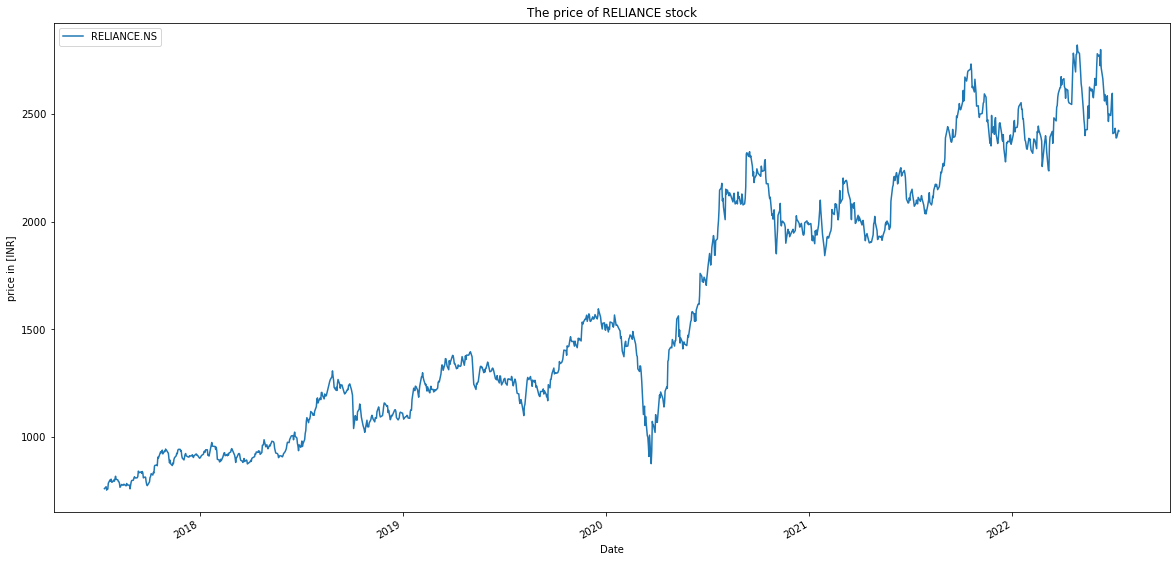

In [11]:
# nice looking timeseries (DataFrame to panda Series)
f = f.reset_index()
f = pd.Series(f.Close.values,f.Date)

print("Start: Year, Month, Day, Time")
print(str(start))
f.plot(label=stock);
plt.legend()
plt.ylabel('price in [INR]')

plt.title("The price of RELIANCE stock")
plt.show();

In [13]:
# The train and test split
train = f.iloc[:-31]
test = f.iloc[-31:]

In [14]:
# Check the R2 and MAE
def get_metrics(true, forecast):
    print("MAPE:", round(mean_absolute_percentage_error(true, forecast) * 100, 4), "%")
    print("MAE:", mean_absolute_error(true, forecast))
    print("RMSE:", mean_squared_error(true, forecast, squared=False))

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [16]:
HW_model = ExponentialSmoothing(train, 
                                initialization_method='legacy-heuristic', 
                                trend="add",
                                seasonal="mul",
                                seasonal_periods=31)

result = HW_model.fit()
HW_forecast = result.forecast(31).to_numpy()

C:\Users\aayus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\aayus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [17]:
HW_forecast = pd.Series(HW_forecast,
                          index=test.index)

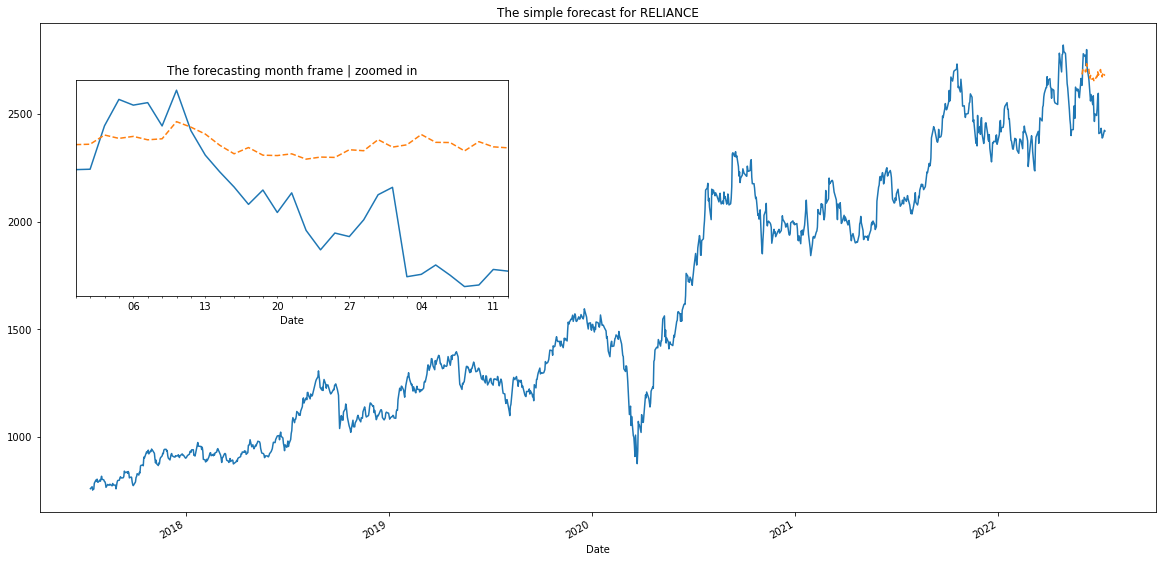

In [21]:
main_axes = plt.axes()
small_axes = plt.axes([.15,.5,.3,.3])

f.plot(ax=main_axes)
HW_forecast.plot(ax=main_axes, ls='dashed')

f.iloc[-31:].plot(ax=small_axes)
HW_forecast.plot(ax=small_axes, ls='dashed')


main_axes.set(title="The simple forecast for RELIANCE");
small_axes.set(yticks=[], xticks=[],
               title="The forecasting month frame | zoomed in");

In [23]:
get_metrics(test, HW_forecast)

MAPE: 5.4912 %
MAE: 136.65425337284321
RMSE: 164.9990080363719


In [24]:
list_of_parameters = \
[
    ["add", "mul", None],
    ["add", "mul", None],
    ["estimated", "heuristic", "legacy-heuristic"],
    [True, False],
    [7, 31, 90, 180, 365]
    # W, M, 3M,  6M,  1Y
]

In [25]:
# Total combinations!
3 * 3 * 3 * 2 * 5

270

We are not using the WalkForward here, it would take so much time.

In [30]:
def gridSearch(list_of_parameters):
    best_score = float('inf') # NEW!
    best_hyperparams = None
    
    for th, parameters in enumerate(product(*list_of_parameters)):
        print(th + 1, "/270", sep="", end="\t")
        
        trend_type, season_type, init_method, use_boxcox, h = parameters
        model = ExponentialSmoothing(train, 
                                    trend=trend_type,
                                    seasonal=season_type,
                                    initialization_method=init_method,
                                    use_boxcox=use_boxcox,
                                    seasonal_periods=h)
        # Learning
        result = model.fit()
        
        # Getting the forecast results
        forecast = result.forecast(31)
        
        # Storing the error
        score = mean_absolute_error(test, forecast) # changed to MAE from MAPE
        
        if score < best_score:
            best_score = score
            best_hyperparams = parameters
            
    return best_score, best_hyperparams

In [31]:
best_score, best_hypers = gridSearch(list_of_parameters)

1/270	2/270	3/270	4/270	5/270	6/270	7/270	8/270	9/270	10/270	11/270	12/270	13/270	14/270	15/270	16/270	17/270	18/270	19/270	20/270	21/270	22/270	23/270	24/270	25/270	26/270	27/270	28/270	29/270	30/270	31/270	32/270	33/270	34/270	35/270	36/270	37/270	38/270	39/270	40/270	41/270	42/270	43/270	44/270	45/270	46/270	47/270	48/270	49/270	50/270	51/270	52/270	53/270	54/270	55/270	56/270	57/270	58/270	59/270	60/270	61/270	62/270	63/270	64/270	65/270	66/270	67/270	68/270	69/270	70/270	71/270	72/270	73/270	74/270	75/270	76/270	77/270	78/270	79/270	80/270	81/270	82/270	83/270	84/270	85/270	86/270	87/270	88/270	89/270	90/270	91/270	92/270	93/270	94/270	95/270	96/270	97/270	98/270	99/270	100/270	101/270	102/270	103/270	104/270	105/270	106/270	107/270	108/270	109/270	110/270	111/270	112/270	113/270	114/270	115/270	116/270	117/270	118/270	119/270	120/270	121/270	122/270	123/270	124/270	125/270	126/270	127/270	128/270	129/270	130/270	131/270	132/270	133/270	134/270	135/270	136/270	137/270	138/270	139/

In [32]:
best_score

91.15172061625721

In [33]:
best_hypers

(None, 'mul', 'estimated', True, 365)

Nice!

Nah! It increases! So, `365` is better!

In [51]:
final_model = ExponentialSmoothing(train, 
                                    trend=None,
                                    seasonal='mul',
                                    initialization_method='estimated',
                                    use_boxcox=True,
                                    seasonal_periods=600)
# Learning
result = final_model.fit()
final_forecast = result.forecast(31).to_numpy()
final_forecast = pd.Series(final_forecast,
                          index=test.index)

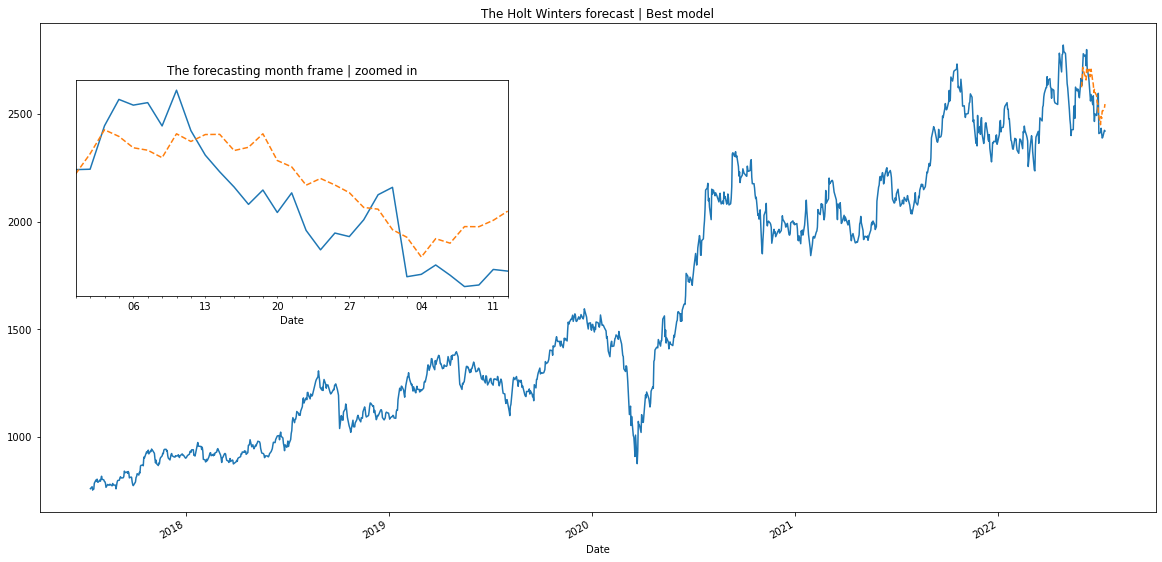

In [52]:
main_axes = plt.axes()
small_axes = plt.axes([.15,.5,.3,.3])

f.plot(ax=main_axes)
final_forecast.plot(ax=main_axes, ls='dashed')

f.iloc[-31:].plot(ax=small_axes)
final_forecast.plot(ax=small_axes, ls='dashed')


main_axes.set(title="The Holt Winters forecast | Best model");
small_axes.set(yticks=[], xticks=[],
               title="The forecasting month frame | zoomed in");

In [53]:
get_metrics(test, final_forecast)

MAPE: 3.0319 %
MAE: 77.11654222979178
RMSE: 85.49891361738496


### 😍 How amazing!

Let's make it to the ***future***!

In [60]:
final_model = ExponentialSmoothing(f, # on whole data
                                    trend=None,
                                    seasonal='mul',
                                    initialization_method='estimated',
                                    use_boxcox=True,
                                    seasonal_periods=365)
# Learning
result = final_model.fit()

In [61]:
final_forecast = result.forecast(365).to_numpy()
final_forecast = pd.Series(final_forecast,
                          index=pd.date_range(f.index[-1], periods=365))

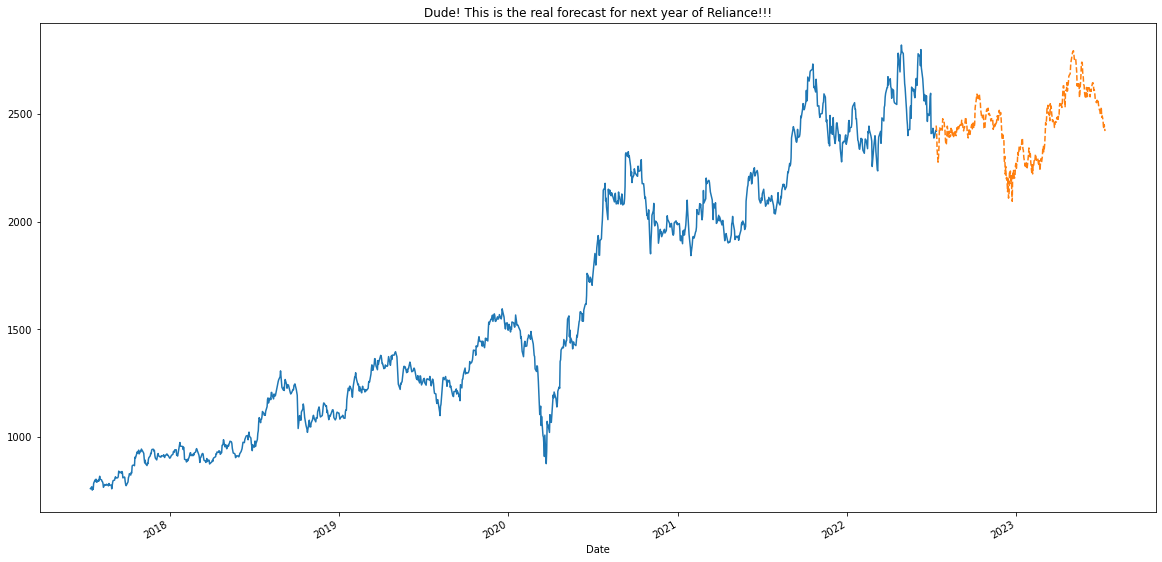

In [62]:
f.plot()
final_forecast.plot(ls='dashed')
plt.title("Dude! This is the real forecast for next year of Reliance!!!");

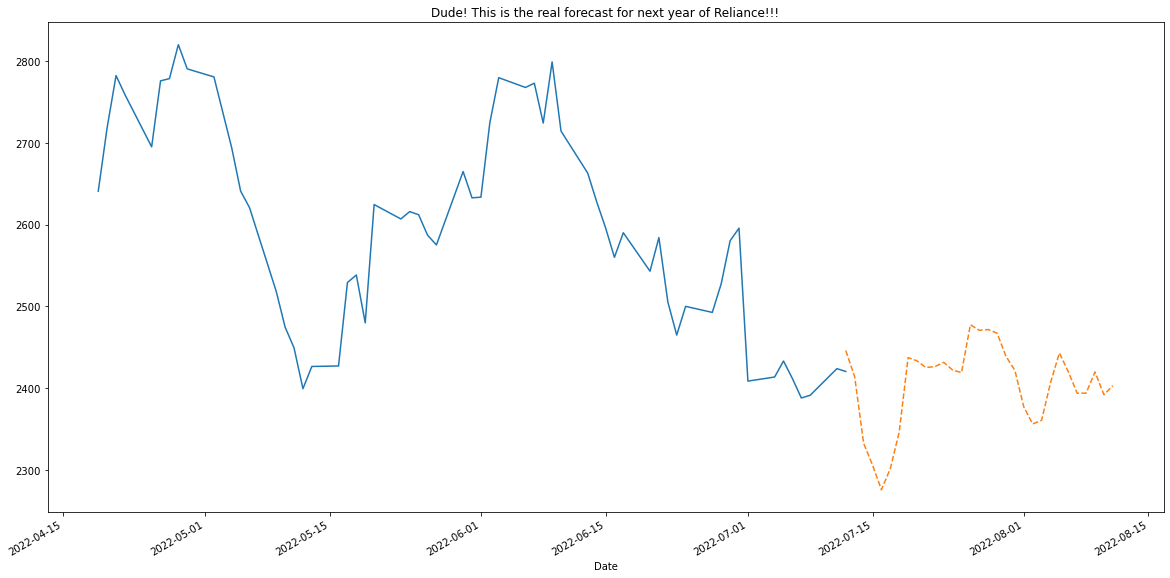

In [66]:
f.iloc[-60:].plot()
final_forecast.iloc[:31].plot(ls='dashed')
plt.title("Dude! This is the real forecast for next year of Reliance!!!");

In [69]:
final_forecast.iloc[:10]

2022-07-12    2445.979209
2022-07-13    2413.851332
2022-07-14    2332.753355
2022-07-15    2306.251768
2022-07-16    2275.917606
2022-07-17    2301.657376
2022-07-18    2346.449374
2022-07-19    2437.401924
2022-07-20    2433.403762
2022-07-21    2425.323026
Freq: D, dtype: float64

The lowest point seems on `15 - Jul` so will keep you updated.

### 😲 Came back!

Continuously, I tracked the real-world prices of RELIANCE and... here they are.

In [3]:
predicted_prices = [2413.851332, 2332.753355, 2306.251768,
                    2275.917606, 2301.657376, 2346.449374,
                    2437.401924, 2433.403762, 2425.323026]

real_prices = [  2379,   2399, 2401, 
               np.nan, np.nan, 2423,
                 2437,   2503, 2486]

In [13]:
# freq is "B" because we will only consider the business days and
# the np.nana where they were saturday and sunday will be skipped
dates = pd.date_range("2022-07-13", periods=7, freq="B")

In [14]:
data = {"forecast-prices": predicted_prices,
        "real-prices": real_prices}

compare = pd.DataFrame(data)

In [15]:
# so to remove those Saturday and Sunday
compare.dropna(inplace=True)
compare.index = dates

In [18]:
compare

,forecast-prices,real-prices
2022-07-13,2413.851332,2379.0
2022-07-14,2332.753355,2399.0
2022-07-15,2306.251768,2401.0
2022-07-18,2346.449374,2423.0
2022-07-19,2437.401924,2437.0
2022-07-20,2433.403762,2503.0
2022-07-21,2425.323026,2486.0


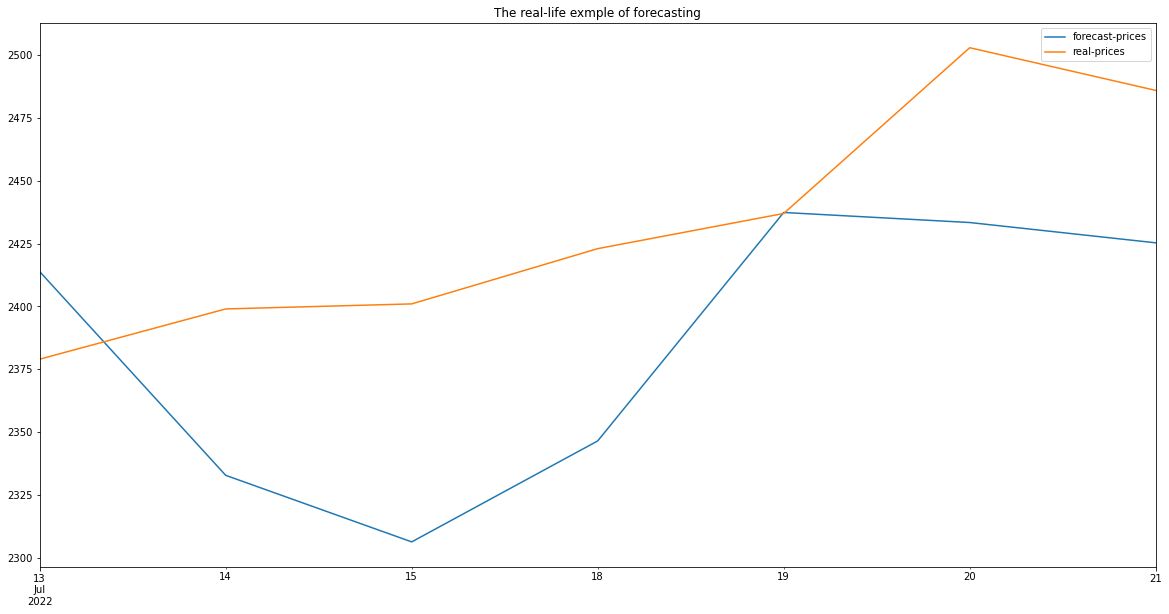

In [73]:
compare.plot()
plt.title("The real-life exmple of forecasting");

How beautiful! We were wrong most of the time!! 😅 <br>
But call it ***concequence*** or anything! On 19th July we were ***EXACTLY*** right! Exactly that price was there which we had predicted!

So if I knew that we are going to be correct on 19th july and if had invested on 12th july for `2349` and sold it on 19th for `2437` then...

In [31]:
buy = 2349 * 100
buy

234900

In [32]:
sell = 2437 * 100
sell

243700

In [33]:
sell - buy

8800

I could have made `8800` clean money. Man! Only if I knew it... that will be right or not! 

# 

# Anyways!
Let's go for next...